purpose of this notebook
baby steps for Quality Control pipeline
plot the folling
* physio
* motion covariate spikes
* TTL triggers
* 

In [33]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

### plot raw EDA signal

802296

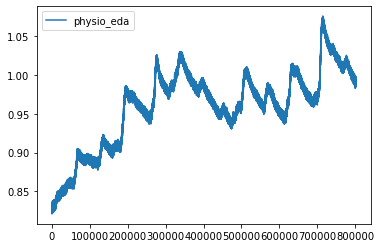

In [34]:
# physio: load physio tsv
pname = '/Users/h/Dropbox (Dartmouth College)/projects_dropbox/social_influence_analysis/scripts/physio/spacetop_fmriprep/sub-0061/ses-01/sub-0061_ses-01_task-cue_run-01-pain_recording-ppg-eda-trigger_physio.tsv'
physio = pd.read_csv(pname, sep = '\t')
physio.plot(y = "physio_eda")
len(physio)

### plot resampled EDA signal

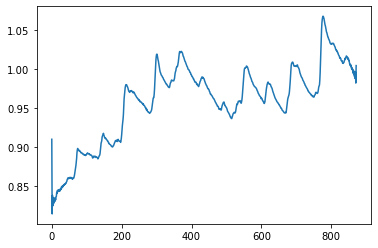

In [35]:
# %% physio: down sample method 1
x = np.arange(0,872,1)
sampling_rate = 2000
fmri_rate = 1/.46
number_of_samples = round(len(physio) * float(fmri_rate) / sampling_rate)
resampled_data = signal.resample(physio["physio_eda"], number_of_samples)
resampled_ttl = signal.resample(physio["trigger_heat"], number_of_samples)
plt.plot(x,resampled_data, label = 'physio')

TODO: need to get rid of endpoints

In [36]:
# %% fmriprep: plot motion covariate
fname = '/Users/h/Dropbox (Dartmouth College)/projects_dropbox/social_influence_analysis/scripts/physio/spacetop_fmriprep/motion_covariates/sub-0061_ses-01_task-social_acq-mb8_run-1_desc-confounds_timeseries.tsv'
motion = pd.read_csv(fname, sep = '\t')
filter_col = []
filter_col = [col for col in motion if col.startswith('motion')]
# combine physio info to motion df
motion['physio'] = resampled_data
threshold, upper, lower = (max(resampled_ttl)-min(resampled_ttl))/2, 1, 0

motion['trigger_heat'] = np.where(resampled_ttl>threshold, upper, lower) # resampled_ttl/15 
filter_col.append('physio')
filter_col.append('trigger_heat')

filter_col

['motion_outlier00',
 'motion_outlier01',
 'motion_outlier02',
 'motion_outlier03',
 'motion_outlier04',
 'motion_outlier05',
 'motion_outlier06',
 'motion_outlier07',
 'motion_outlier08',
 'motion_outlier09',
 'physio',
 'trigger_heat']

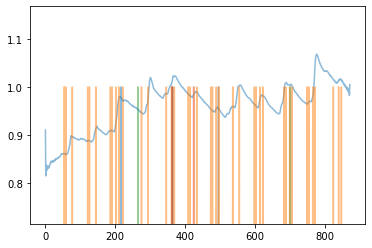

In [37]:
plt.ylim([min(motion['physio'])-0.1, max(motion['physio'])+0.1 ])


plt.plot(motion[filter_col], alpha=0.5)


In [39]:
plt.show()
plt.clf()
plt.savefig('./motioncovariate_rawdata.png', dpi = 300)

<Figure size 432x288 with 0 Axes>